In [5]:
import math
def avg(e1,s1,e2,s2):
    e=(e1*s2*s2+e2*s1*s1)/(s1*s1+s2*s2)
    s=s1*s2/math.sqrt(s1*s1+s2*s2)
    print("%.1f(%.2f)"%(e,s))

avg(125.3,10,132,15)

127.4(8.32)


In [10]:
#AIs=["R","I","RT","G","ZTS"]
AIs=["R","I","G","RT","ZTS"]
def antisym(d):
    for i in AIs:
        for j in AIs:
            if i==j:
                d[j][i]=(0,0)
            if i not in d[j]:
                d[j][i]=(-1*d[i][j][0],d[i][j][1])
    return d

def totable(d):
    for i in AIs:
        print("%3s& "%(i)+"& ".join(["%4d"%(d[i][j][0],) for j in AIs])+"\\\\")

d={"R":{"I":(194,4),"RT":(244,8),"G":(275,5),"ZTS":(319,16)},
   "I":{"RT":(41,8),"G":(80,6),"ZTS":(127,8)},
   "RT":{"G":(-3,9),"ZTS":(99,18)},
   "G":{"ZTS":(60,5)},
   "ZTS":{}}
d=antisym(d)
totable(d)
print(d)

  R&    0&  194&  275&  244&  319\\
  I& -194&    0&   80&   41&  127\\
  G& -275&  -80&    0&    3&   60\\
 RT& -244&  -41&   -3&    0&   99\\
ZTS& -319& -127&  -60&  -99&    0\\
{'R': {'I': (194, 4), 'RT': (244, 8), 'G': (275, 5), 'ZTS': (319, 16), 'R': (0, 0)}, 'I': {'RT': (41, 8), 'G': (80, 6), 'ZTS': (127, 8), 'R': (-194, 4), 'I': (0, 0)}, 'RT': {'G': (-3, 9), 'ZTS': (99, 18), 'R': (-244, 8), 'I': (-41, 8), 'RT': (0, 0)}, 'G': {'ZTS': (60, 5), 'R': (-275, 5), 'I': (-80, 6), 'G': (0, 0), 'RT': (3, 9)}, 'ZTS': {'R': (-319, 16), 'I': (-127, 8), 'G': (-60, 5), 'RT': (-99, 18), 'ZTS': (0, 0)}}


In [36]:
import itertools,random,numpy
d={'R': {'I': (194, 4), 'RT': (244, 8), 'G': (275, 5), 'ZTS': (319, 16), 'R': (0, 0)}, 
   'I': {'RT': (41, 8), 'G': (80, 6), 'ZTS': (127, 8), 'R': (-194, 4), 'I': (0, 0)}, 
   'RT': {'G': (-3, 9), 'ZTS': (99, 18), 'R': (-244, 8), 'I': (-41, 8), 'RT': (0, 0)}, 
   'G': {'ZTS': (60, 5), 'R': (-275, 5), 'I': (-80, 6), 'G': (0, 0), 'RT': (3, 9)}, 
   'ZTS': {'R': (-319, 16), 'I': (-127, 8), 'G': (-60, 5), 'RT': (-99, 18), 'ZTS': (0, 0)}}
AIs=["R","I","G","ZTS"]
def get_transitivity(gamma=0.0):
    l=[]
    for i,j,k in itertools.combinations(AIs,3):
        x=random.gauss(d[i][j][0],d[i][j][1]*gamma)
        y=random.gauss(d[j][k][0],d[j][k][1]*gamma)
        z=random.gauss(d[i][k][0],d[i][k][1]*gamma)
        n=abs(x+y-z)
        #m=abs(x)+abs(y)+abs(z)
        m=(abs(x)*abs(y)*abs(z))**(1/3)
        name=",".join([i,j,k])
        l.append((name,n,m,n/m))
        #print("%8s %2d %3d %.3f"%(name,n,m,n/m))
    print(l)
    #return sum([i[3]*i[1] for i in l])/sum([i[1] for i in l])
    return sum([i[3]*i[1]*i[2] for i in l])/sum([i[1]*i[2] for i in l])

print(get_transitivity())

#l=[get_transitivity() for i in range(10000)]
#print(numpy.mean(l))
#print(numpy.sqrt(numpy.var(l)))


[('R,I,G', 1.0, 162.20894646124296, 0.006164888076866542), ('R,I,ZTS', 2.0, 198.82243025498838, 0.010059227208092237), ('R,G,ZTS', 16.0, 173.95017730614614, 0.09198036039848678), ('I,G,ZTS', 13.0, 84.7907192881195, 0.1533186663486826)]
0.09673059595964928


In [40]:
"""trans_data=[('R,I,G', 1.0, 549.0, 0.0018214936247723133), 
            ('R,I,ZTS', 2.0, 640.0, 0.003125), 
            ('R,G,ZTS', 16.0, 654.0, 0.024464831804281346), 
            ('I,G,ZTS', 13.0, 267.0, 0.04868913857677903),
            ('origin',0,0,0)]"""
"""trans_data=[('R,I,G', 1.0, 549.0, 0.0018214936247723133), 
            ('R,I,RT', 9.0, 479.0, 0.018789144050104383), 
            ('R,I,ZTS', 2.0, 640.0, 0.003125), 
            ('R,G,RT', 34.0, 522.0, 0.06513409961685823), 
            ('R,G,ZTS', 16.0, 654.0, 0.024464831804281346), 
            ('R,RT,ZTS', 24.0, 662.0, 0.03625377643504532), 
            ('I,G,RT', 42.0, 124.0, 0.3387096774193548), 
            ('I,G,ZTS', 13.0, 267.0, 0.04868913857677903), 
            ('I,RT,ZTS', 13.0, 267.0, 0.04868913857677903), 
            ('G,RT,ZTS', 42.0, 162.0, 0.25925925925925924),
            ('origin',0,0,0)]"""
trans_data=[('R,I,G', 1.0, 162.20894646124296, 0.006164888076866542),
            ('R,I,ZTS', 2.0, 198.82243025498838, 0.010059227208092237),
            ('R,G,ZTS', 16.0, 173.95017730614614, 0.09198036039848678),
            ('I,G,ZTS', 13.0, 84.7907192881195, 0.1533186663486826),
            ('origin',0,0,0)]
trans_data.sort(key=lambda x:x[2])

def int_area(trans_data):
    s=0
    for i in range(len(trans_data)-1):
        yi=trans_data[i][1]
        yj=trans_data[i+1][1]
        xi=trans_data[i][2]
        xj=trans_data[i+1][2]
        s+=(yi+yj)*(xj-xi)
    return s
        
#int_area([(None,0,0),(None,1,1),(None,1,2)])
int_area(trans_data)/max([i[2] for i in trans_data])**2

0.07167746756153773

<IPython.core.display.Javascript object>


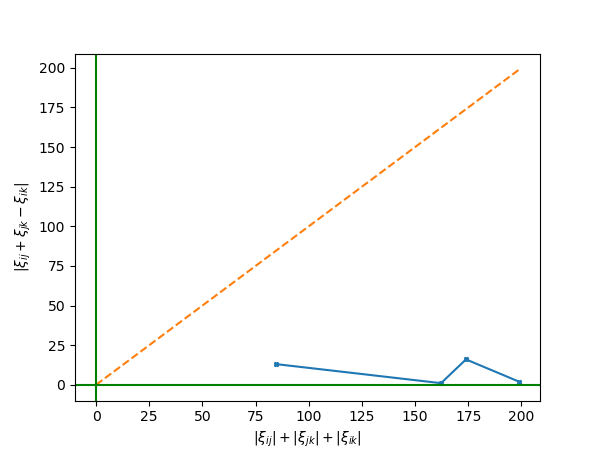

In [39]:
%matplotlib notebook
trans_data=[('R,I,G', 1.0, 162.20894646124296, 0.006164888076866542), ('R,I,ZTS', 2.0, 198.82243025498838, 0.010059227208092237), ('R,G,ZTS', 16.0, 173.95017730614614, 0.09198036039848678), ('I,G,ZTS', 13.0, 84.7907192881195, 0.1533186663486826)]
trans_data.sort(key=lambda x:x[2])
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_size_inches(6,4.5)
ax1=fig.subplots(1)
xs=[i[2] for i in trans_data]
ys=[i[1] for i in trans_data]
ax1.plot(xs,ys,"X-",ms=3)
ax1.plot([0,max(xs)],[0,max(xs)],"--")
ax1.axhline(y=0, xmin=0, xmax=1,c="green")
ax1.axvline(x=0, ymin=0, ymax=1,c="green")
ax1.set_xlabel("$|\\xi_{ij}|+|\\xi_{jk}|+|\\xi_{ik}|$")
ax1.set_ylabel("$|\\xi_{ij}+\\xi_{jk}-\\xi_{ik}|$")
plt.show()